In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

from textwrap import wrap

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
columns = ['Q27[SQ001]','Q27[SQ002]','Q27[SQ003]','Q27[SQ004]','Q27[SQ005]','Q27[SQ006]','Q27[SQ007]','Q27[SQ008]','Q27[SQ009]','Q27[SQ010]']
columns_names = [
    'Face to face interactions',
    'Mobile messaging (WhatsApp, Telegram, Signal, ...)',
    'Direct e-mail',
    'Mailing list',
    'Facebook',
    'Twitter',
    'Version Control repositories (GitHub, GitLab, BitBucket, ...)',
    'File Storage (Google Drive, DropBox, ...)',
    'Project Management platforms (Basecamp, Zoho, ...)',
    'Realtime chat (Slack, Rocket.Chat, Mattermost, ...)'
]
profile = data[columns]

In [5]:
profile.columns = columns_names

In [6]:
profile2 = profile.fillna(0)

In [7]:
profile2.describe().loc["mean"]

Face to face interactions                                        45.000
Mobile messaging (WhatsApp, Telegram, Signal, ...)               11.875
Direct e-mail                                                     4.125
Mailing list                                                      0.625
Facebook                                                          0.875
Twitter                                                           0.250
Version Control repositories (GitHub, GitLab, BitBucket, ...)     5.375
File Storage (Google Drive, DropBox, ...)                        20.375
Project Management platforms (Basecamp, Zoho, ...)                3.375
Realtime chat (Slack, Rocket.Chat, Mattermost, ...)               8.125
Name: mean, dtype: float64

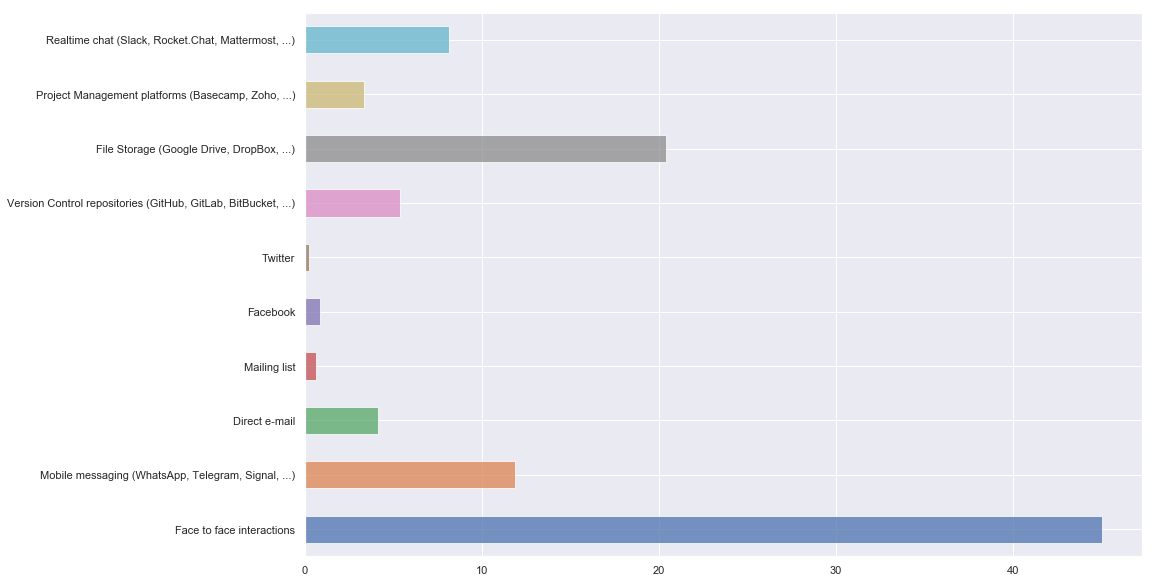

In [8]:
profile2.describe().loc["mean"].plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10))

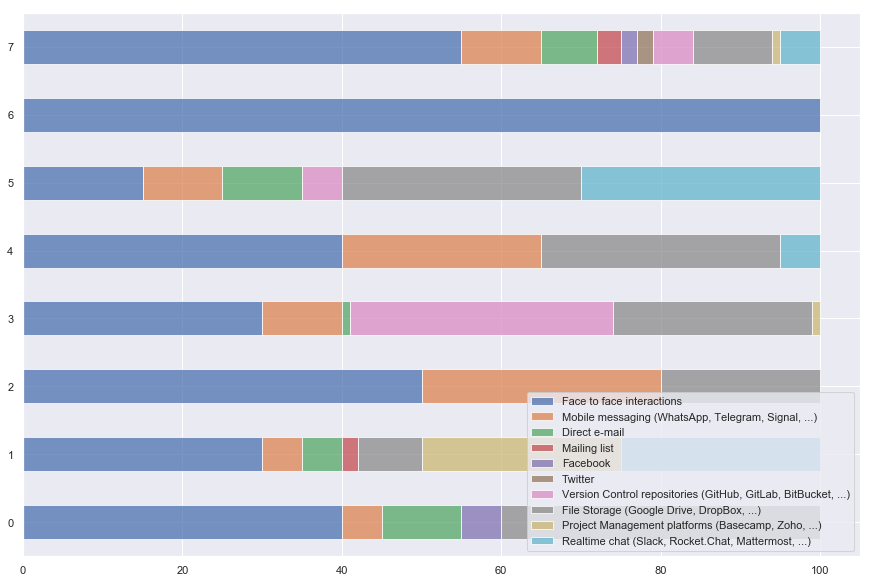

In [9]:
profile2.plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10), stacked=True)

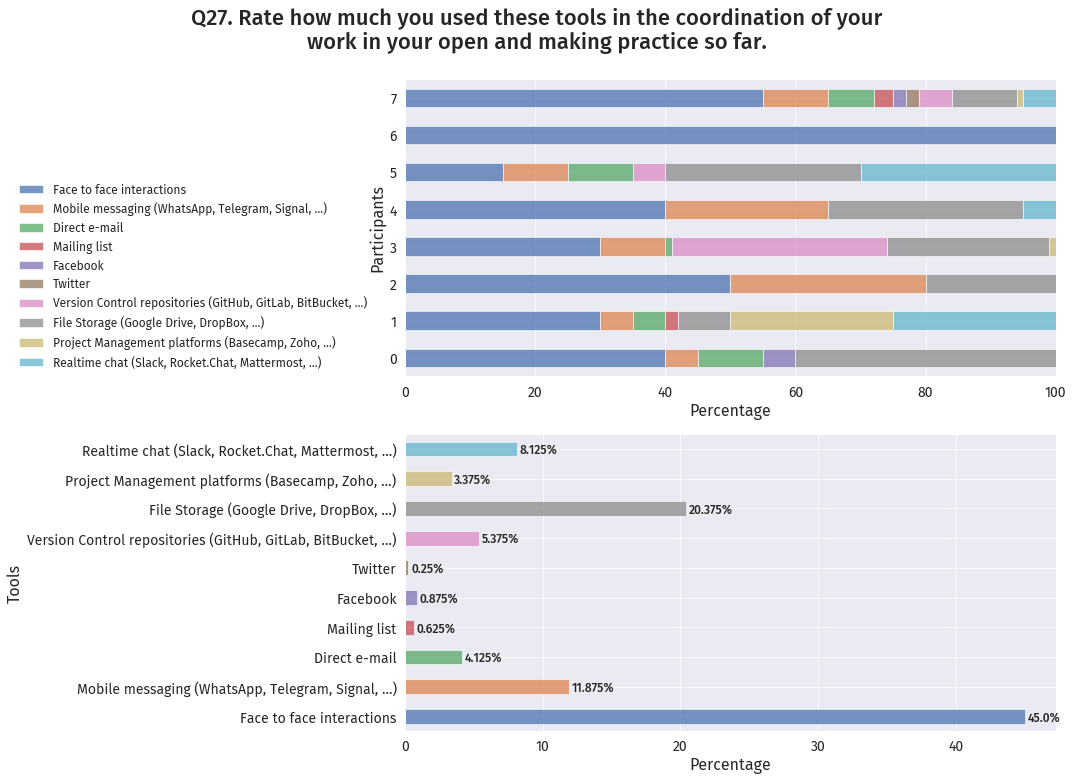

In [10]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Subplots
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
title = 'Q27. Rate how much you used these tools in the coordination of your work in your open and making practice so far.'
fig.suptitle("\n".join(wrap(title, 70)), fontsize=22, y=1.08, fontname='Fira Sans', fontweight="500")
# Plot the data 1
ax1 = fig.add_subplot(2, 1, 1)
profile2.plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10), stacked=True, ax=plt.gca())
plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Participants', fontsize=16, x=2.82)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax1.legend(loc='lower left', bbox_to_anchor= (-0.6, 0.01), borderaxespad=0, frameon=False, fontsize=12)
ax1.set_xlim(0,100)
# Plot the data 2
ax2 = fig.add_subplot(2, 1, 2)
profile2.describe().loc["mean"].plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10), ax=plt.gca())
for i, v in enumerate(profile2.describe().loc["mean"]):
    plt.text(v + .2, i-0.15, str(v)+"%", fontweight='500', fontsize=12)
plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Tools', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.savefig("svg/Q27.svg", bbox_inches="tight")
plt.savefig("png/Q27.png", dpi=300, bbox_inches="tight")